In [25]:
from itertools import product, combinations
import numpy as np
import math
import operator
from matplotlib import pyplot as plt
import functools
def nCr(n,r):
    f = math.factorial
    return f(n) / f(r) / f(n-r)
def list_powerset(lst):
    return functools.reduce(lambda result, x: result + [subset + [x] for subset in result], lst, [[]])
from collections import Counter
import time
from sklearn.utils import shuffle
from heapq import nsmallest
import scipy.io
import statistics
from matplotlib import colors

#--------------------
import uBIAmodule

In [26]:
data1 = scipy.io.loadmat('songbird_data1_pitch.mat')
data2 = scipy.io.loadmat('songbird_data1_premotor.mat')

pitch_data=data1['Expression1']
print(len(pitch_data))
median_p=statistics.median(pitch_data)
pitch_binary=np.where(pitch_data>median_p,1,0)
#print(pitch_binary)

spikes_data=data2['Expression1']
print(len(spikes_data))
print(len(spikes_data[0]))
M=len(pitch_data)

# "samples" has in its first component the binarized behavior (pitch>median), 
# and then spike/no spike in 2ms bins (40ms window previous to behavior)
samples=np.hstack((pitch_binary,spikes_data))

498
498
20


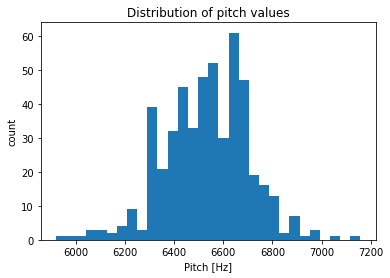

In [27]:
plt.hist(pitch_data, bins = 30)#math.floor(np.sqrt(M))
plt.title('Distribution of pitch values')
plt.xlabel('Pitch [Hz]')
plt.ylabel('count')

plt.show()

# Defining parameters of underlying probability distribution
Log-linear model for underlying interactions:
$$\log p(x|\theta) = \sum_i^N \theta_i x_i + \sum_{ij}^N \theta_{ij} x_i x_j + \sum_{ijk}^N \theta_{ijk} x_i x_j x_k +...= \sum_{\nu} \theta_{\nu} \prod_{i\in V_{\nu}} x_i -\log \mathcal{Z}$$

In [28]:

#dimension of data
T=len(samples[0])#21
#number of steps to do path integral for magnetization
n_e=20 
#number of shufflings for significance test
nmix=10
#number of pattern in full Ising model, after filtering by field
Nmax=1000

np.random.seed(1)

# Infering codewords from finite samples using uBIA

In [29]:
print(samples[:10])

[[1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0]
 [1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0]]


In [30]:
hcutoff=0.05

M=len(samples) #number of samples
pi=np.sum(samples,axis=0)
pi=[1.*i/M for i in pi] #empirical individual probabilities

start_time = time.time()

dicset=uBIAmodule.extract_patt(samples)
print(len(dicset))

sorted_patt=uBIAmodule.magn_field(dicset,M,pi)
Nmax1=min(Nmax,len(sorted_patt))
print(len(sorted_patt))

h0=[sorted_patt[i][1][0] for i in range(Nmax1)]

Jvw=uBIAmodule.couplings(sorted_patt, M, pi, Nmax1)

results=uBIAmodule.marg_magn_h1ef(h0, Jvw, M)
mi=results[0]
h1ef=results[1]

neopt=uBIAmodule.level_inverse_reg(h0,h1ef,n_e,0.5)
print(neopt)

mm_sorted_patt=uBIAmodule.marg_magn_sorted(sorted_patt,mi,neopt)

#codewords that include the behavior
codewords=uBIAmodule.select_codewords(sorted_patt,mi,neopt) 

#codewords that include the behavior and overoccur
codewords_over=uBIAmodule.select_codewords_overoccur(sorted_patt,mi,neopt)

print("\n Sorted by marginal magnetization at e* (c=0.5):")
for pp in mm_sorted_patt[:5]:
    print(pp)

print("\n Codewords that include the behavior, sorted by marginal magnetization at e* (c=0.5):")
for pp in codewords[:min(5,len(codewords))]:
    print(pp)  
    
print("\n Codewords that overoccur with behavior, sorted by marginal magnetization at e* (c=0.5):")
for pp in codewords_over[:min(10,len(codewords))]:
    print(pp)
    

print("\n--- %s seconds ---" % (time.time() - start_time))

34156
1000
20

 Sorted by marginal magnetization at e* (c=0.5):
((13, 14), [0.6258110242463125, 459.56160270345424, 41, 84.6867469879518])
((12, 13), [0.600168798202174, 431.3562006044207, 36, 78.32530120481927])
((17, 18), [0.5085644638766619, 374.3053376956804, 9, 48.25301204819277])
((11, 12), [0.5023002113067739, 333.8829462460412, 26, 63.29317269076305])
((14, 15), [0.4926598958640871, 350.30968073192753, 37, 75.27710843373494])

 Codewords that include the behavior, sorted by marginal magnetization at e* (c=0.5):
((0, 9, 13), [0.16420223222434546, 95.083087594244, 36, 16.102409638554217])
((0, 10, 13), [0.14417581411874605, 71.0012307904867, 43, 25.445783132530117])
((0, 17, 18), [0.1329710127996864, 95.52964767693216, 4, 24.126506024096386])
((0, 16, 17), [0.12742899128406585, 106.62482623515139, 8, 29.309236947791163])
((0, 19, 20), [0.12525746298431922, 71.72450208731574, 2, 19.481927710843376])

 Codewords that overoccur with behavior, sorted by marginal magnetization at e* (

# Significance level
mc[x_,m1_]:=m1 x^(-0.23)Exp[-0.015 (Log[x]^2)]

mc[n_false, m1= magnetization 1st]= m1 f(nf) (see sacaling between magn and n_false in mlevel_nf.nb)

mc[0.3,1]=1.29

mc[0.1,1]=1.57

mc[0.03,1]=1.86

In [31]:
start_time = time.time()

mcx=np.zeros((10,n_e+1)) #ten largest values of marg. magnetizations for codewords in shuffled data (for each level of ee)
mclowx=np.zeros((10,n_e+1))

for nn in range(nmix):#nmix

    #shuffling columns of data (keeping the firing rate fixed)
    tsam=np.transpose(samples)
    tsam_shuf=[shuffle(ti) for ti in tsam]
    sam_shuf=np.transpose(tsam_shuf)

    dicset_s=uBIAmodule.extract_patt(sam_shuf)
    #print(len(dicset_s))

    sorted_patt_s=uBIAmodule.magn_field(dicset_s,M,pi)
    #print(len(sorted_patt_s))
    Nmax_s=min(Nmax,len(sorted_patt_s))
    
    h0_s=[sorted_patt_s[i][1][0] for i in range(Nmax_s)]

    Jvw_s=uBIAmodule.couplings(sorted_patt_s, M, pi, Nmax_s)

    results_s=uBIAmodule.marg_magn_h1ef(h0_s, Jvw_s, M)
    mi_s=results_s[0]
    h1ef_s=results_s[1]
    
    for kk in range(n_e+1):
        #how strong can the marginal magnetizetion be for every level of \epsilon?
        mcx[:,kk]+=sorted(mi_s[:,kk],reverse=True)[:10]
        mclowx[:,kk]+=sorted(mi_s[:,kk])[:10]
    
    print(nn,"--- %.2f seconds ---" % (time.time() - start_time))

mcx=(1./nmix)*mcx
mclowx=(1./nmix)*mclowx

print(mcx[0])

0 --- 27.24 seconds ---
1 --- 54.37 seconds ---
2 --- 83.38 seconds ---
3 --- 111.96 seconds ---
4 --- 139.84 seconds ---
5 --- 168.63 seconds ---
6 --- 197.83 seconds ---
7 --- 227.35 seconds ---
8 --- 257.12 seconds ---
9 --- 283.95 seconds ---
[0.         0.00373509 0.00737383 0.01091601 0.01436146 0.01771003
 0.02096164 0.02411622 0.02717375 0.03013423 0.03304223 0.03587754
 0.0386277  0.04129282 0.04387304 0.04647938 0.04903361 0.05152028
 0.05393957 0.05631236 0.05864561]


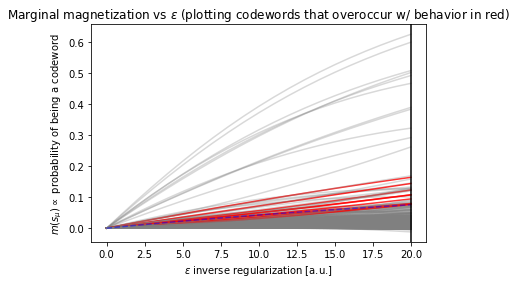

In [32]:
if M<800:
    mc1=1.29 #for $M \in (200,800)$
elif (M>=800) and (M<1600):
    mc1=1.57 #for $M \in (800,1600)$
elif M>=1600:
    mc1=1.86 #for $M \in (1600,3200)$

for j in range(len(mi)):
    if (mi[j][neopt]>mc1*mcx[0][neopt]) and (0 in sorted_patt[j][0]) and (sorted_patt[j][1][1]>sorted_patt[j][1][2]):
        plt.plot(mi[j],'red',alpha=0.8)
    else:
        plt.plot(mi[j],'gray',alpha=0.3)


plt.plot(mc1*mcx[0],'b--',alpha=0.5)

plt.axvline(x=neopt, color='k')       

plt.title('Marginal magnetization vs $\epsilon$ (plotting codewords that overoccur w/ behavior in red)')
plt.ylabel('$m(s_{\mu}) \propto$ probability of being a codeword')
plt.xlabel('$\epsilon$ inverse regularization [a.u.]')

plt.show()

In [34]:
threshold=mc1*mcx[0][neopt]
print(threshold)
print("\n Codewords that overoccur w/ behavior, which are above threshold:")
for pp in codewords_over:#[:40]:
    if pp[1][0]>threshold:
        print(pp)

#print("\n Codewords that overoccur w/ behavior (first ten):")
#for pp in codewords_over[:10]:
#    print(pp)

0.07565283908262362

 Codewords that overoccur w/ behavior, which are above threshold:
((0, 9, 13), [0.16420223222434546, 95.083087594244, 36, 16.102409638554217])
((0, 10, 13), [0.14417581411874605, 71.0012307904867, 43, 25.445783132530117])
((0, 15, 18), [0.12298208884636366, 51.66139095502345, 39, 23.85542168674699])
((0, 11, 14), [0.10789005351309529, 46.66878298503931, 49, 34.21686746987952])
((0, 12, 18), [0.10736561026267777, 44.79205227700613, 41, 26.701807228915662])
((0, 12, 14), [0.09450319768007628, 38.45619990394883, 56, 42.12951807228915])
((0, 9, 13, 17), [0.079534217704374, 42.432088514161656, 19, 5.755479750326607])
((0, 16, 19), [0.07931108555435257, 32.41134315167478, 34, 21.734939759036145])
((0, 15), [0.07837741733949007, 24.13755020080321, 101, 88.0])
((0, 18), [0.07670428589095074, 24.474774096385545, 80, 67.5])


Highlighted codeword:  [8, 12, 16]


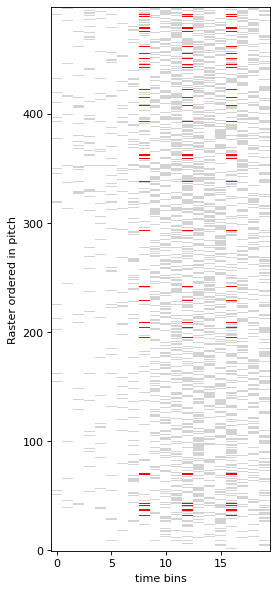

In [35]:
#Highlighting codewords in ordered (by pitch value) scatter plot

word=codewords_over[6][0][1:]#removing 1st component (binary behavior), and substracting 1
word=[tt-1 for tt in word]
print("Highlighted codeword: ",word)

ind_pitch_high=sorted(range(len(pitch_data)),key=pitch_data.__getitem__)#, reverse=True

ordered_spikes_data=[spikes_data[j] for j in ind_pitch_high]
ordered_spikes_data2=[spikes for spikes in ordered_spikes_data]

for j in ind_pitch_high:
    if [ordered_spikes_data[j][i] for i in word]==[1]*len(word):
        for tt in word:
            ordered_spikes_data2[j][tt]+=1

# make a color map of fixed colors
cmap = colors.ListedColormap(['white', 'lightgray', 'red'])
bounds=[-0.5,0.5,1.5,2.5]
norm = colors.BoundaryNorm(bounds, cmap.N)
plt.figure(figsize=(12, 9), dpi=80)

# tell imshow about color map so that only set colors are used
plt.imshow(ordered_spikes_data2, interpolation='nearest', origin='lower', cmap=cmap, norm=norm, aspect=0.1)
plt.xlabel('time bins')
plt.ylabel('Raster ordered in pitch')

plt.show()